# Feature Standardization
- using GAN's model pixel value across the entire dataset can be standardized
- standardizing the pixel which is performed for each column in a tabular dataset
- can be done by setting feature wise_ceter and feature wise_std_normalization 

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt

In [2]:
# load data
(xtrain,ytrain),(xtest,ytest)= mnist.load_data()
xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

In [3]:
#reshape to be
xtrain=xtrain.reshape((xtrain.shape[0],28,28,1)).astype('float32')
xtest=xtest.reshape((xtest.shape[0],28,28,1)).astype('float32')
xtrain.shape, xtest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [23]:
#define data preparation
datagen=ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)
datagen.fit(xtrain)


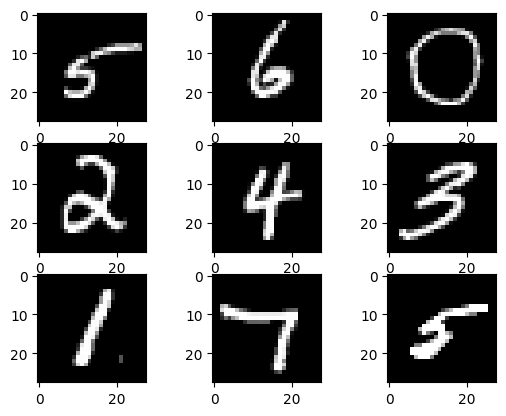

[5 6 0 2 4 3 1 7 5]


In [25]:
#configure batch size and retrieve one batch of images 
for xbatch,ybatch in datagen.flow(xtrain,ytrain,batch_size=9):
    for i in range(0,9):
        plt.subplot(330+1+i)
        plt.imshow(xbatch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    plt.show()
    print(ybatch)
    break

# ZCA- Zero Component Analysis Whitening 
- if pixels are redundant then training process cant be effective, solution whitening of an image
- the process of transfoeming the original image using a linear algebra operation that reduce the redundancy in the matrix of prixel in called as whitening transformation
- advantages
- less redundant pixels in the image can improve the structure and features in the image so learning can be effective 

In [8]:
datagen2=ImageDataGenerator(zca_whitening=True)
datagen2.fit(xtrain)

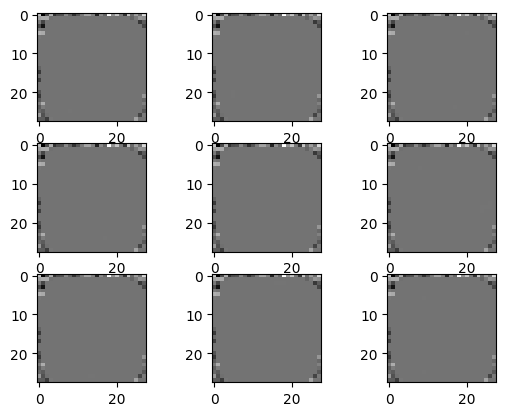

In [9]:
for xbatch,ybatch in datagen2.flow(xtrain,ytrain,batch_size=9):
    for i in range(0,9):
        plt.subplot(330+1+i)
        plt.imshow(xbatch[i].reshape(28,28),cmap=plt.get_cmap('grey'))
    plt.show()
    break     

# Randowm Flips
- augmentation technique on an image data to improve the performance on large and complex problems 

In [4]:
datagen3=ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen3.fit(xtrain)

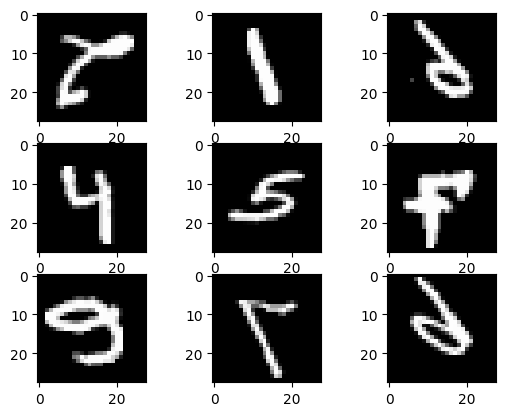

In [5]:
for xbatch,ybatch in datagen3.flow(xtrain,ytrain,batch_size=9):
    for i in range(0,9):
        plt.subplot(330+1+i)
        plt.imshow(xbatch[i].reshape(28,28),cmap=plt.get_cmap('grey'))
    plt.show()
    break